In [1]:
from CASBI.generator import *
import CASBI.utils as utils 

import torch
import pandas as pd

In [2]:
test_set_file = '../../data/test_and_nll/test_set.parquet'
# model_snapshot = './snapshot/snapshot_best.pth'
model_snapshot = '../../MW_MH/tests/architecture/distributed/test_set_implemetantion/snapshot_12_256_3_02.pth'
inverse_rescale_file = '../../data/preprocess/mean_and_std.parquet'

In [3]:
Flow = NF_condGLOW(12, dim_notcond=2, dim_cond=12, CL=NSF_CL2, network_args=[256, 3, 0.2]).to('cuda:0')
Flow.load_state_dict(torch.load(model_snapshot)['MODEL_STATE'])

<All keys matched successfully>

In [4]:
test_set = pd.read_parquet('../../data/test_and_nll/test_set.parquet')
test_set = utils.rescale(df=test_set, mean_and_std_path=inverse_rescale_file, inverse=True)

df_sample = utils.create_sample_df(df_to_sample=test_set, Flow=Flow, inverse_rescale_file=inverse_rescale_file)

/export/home/vgiusepp/miniconda3/envs/test/lib/python3.10/site-packages/CASBI/utils.py:421: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, generated_data])


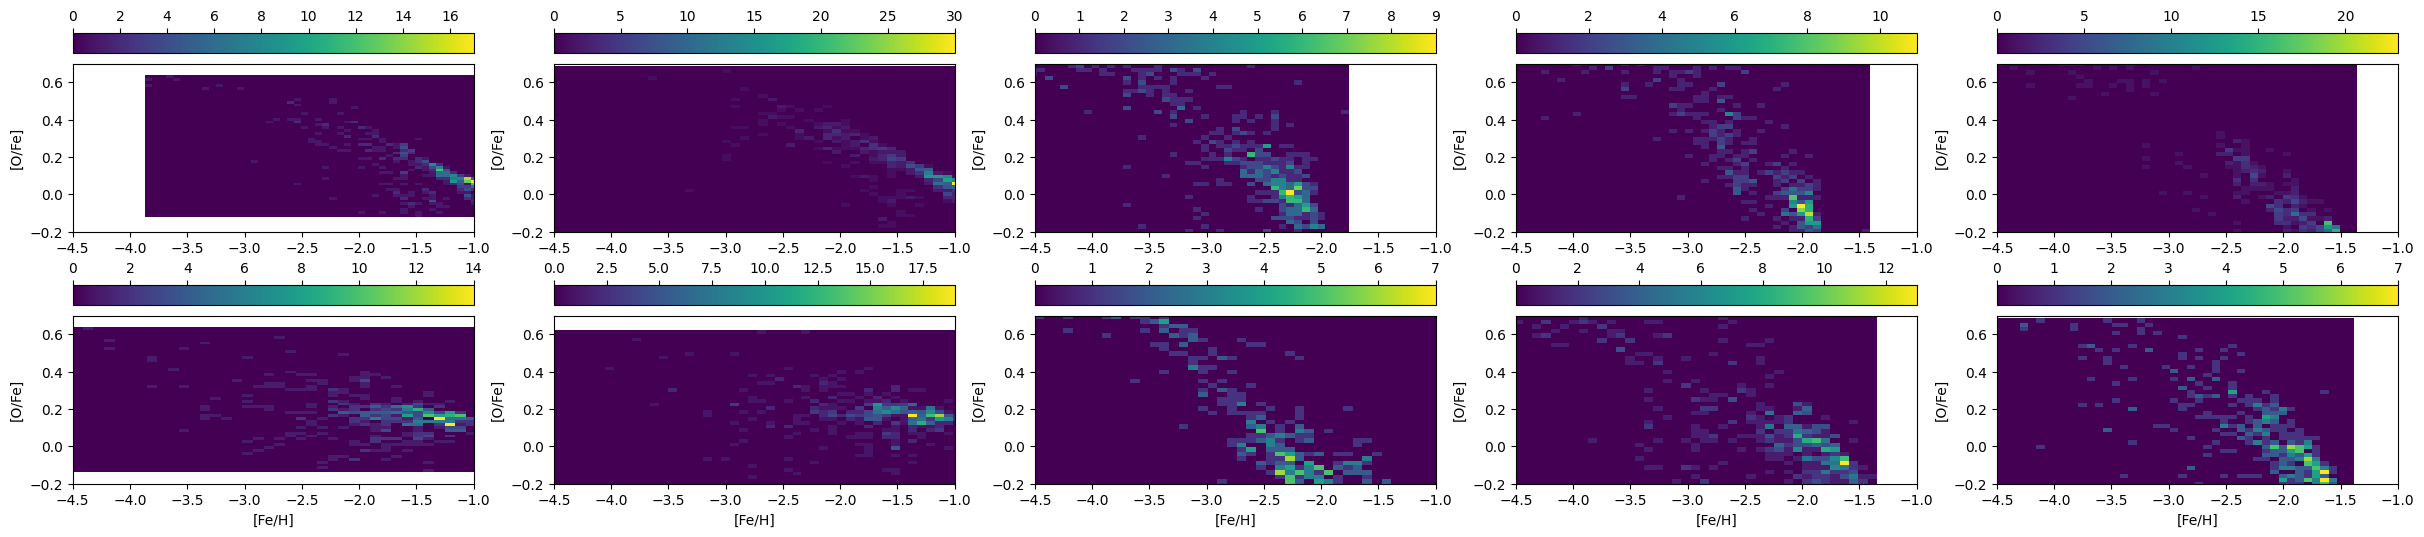

In [5]:
fig = plt.figure(figsize=(30, 6))
bad_column = ['Galaxy_name']
other_columns = test_set.columns.difference(bad_column, sort=False)

i=0
for galaxy in np.random.choice(test_set['Galaxy_name'].unique(), size=5):
    true_galaxy_plot = test_set[test_set['Galaxy_name']==galaxy]
    sample_galaxy_plot = df_sample[df_sample['Galaxy_name']==galaxy]
    i+=1
    ax = fig.add_subplot(2,5,i)
    cax = ax.hist2d(true_galaxy_plot['feh'], true_galaxy_plot['ofe'],
                    bins=50);
    fig.colorbar(cax[3], ax=ax, location='top')
    ax.set_xlim(-4.5, -1.0)
    ax.set_ylim(-0.2, 0.7)
    ax.set_ylabel('[O/Fe]')
    
    ax = fig.add_subplot(2, 5, i+5)
    cax = ax.hist2d(sample_galaxy_plot['feh'], sample_galaxy_plot['ofe'], bins=50);
    ax.set_xlim(-4.5, -1.0)
    ax.set_ylim(-0.2, 0.7)
    ax.set_xlabel('[Fe/H]')
    ax.set_ylabel('[O/Fe]')
    fig.colorbar(cax[3], ax=ax, location='top')

100%|██████████| 30/30 [00:05<00:00,  5.21it/s]


<KL>: 20989.06, <JS>:, 0.24, <D>: 0.46, NLL:, 3.43


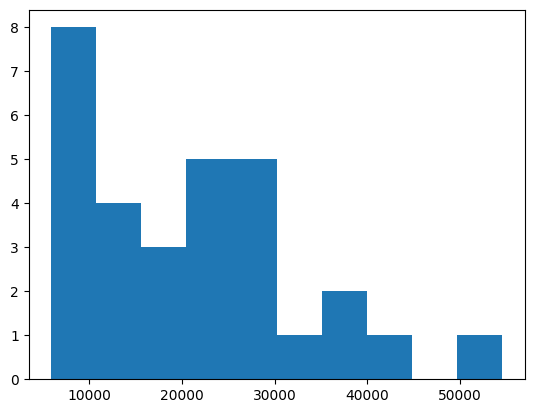

In [8]:
kl_mean, js_mean, D_mean = utils.get_test_metric(test_set, df_sample, Flow, inverse=True, inverse_rescale_file=inverse_rescale_file)
nll = np.load('../../data/test_and_nll/test_loss.npz')['nll']

print(f'<KL>: {kl_mean:.2f}, <JS>:, {js_mean:.2f}, <D>: {D_mean:.2f}, NLL:, {nll[0]:.2f}')

500


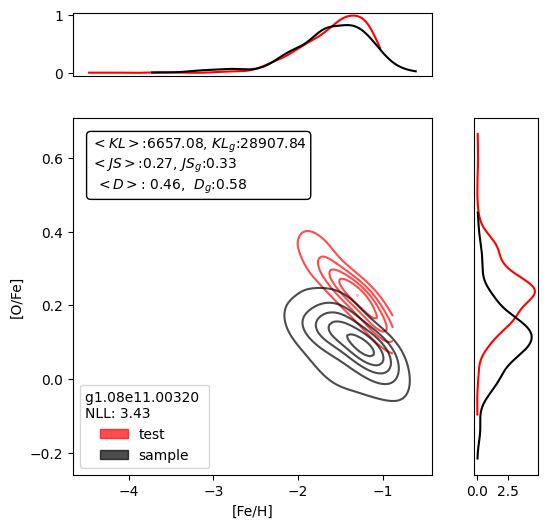

500


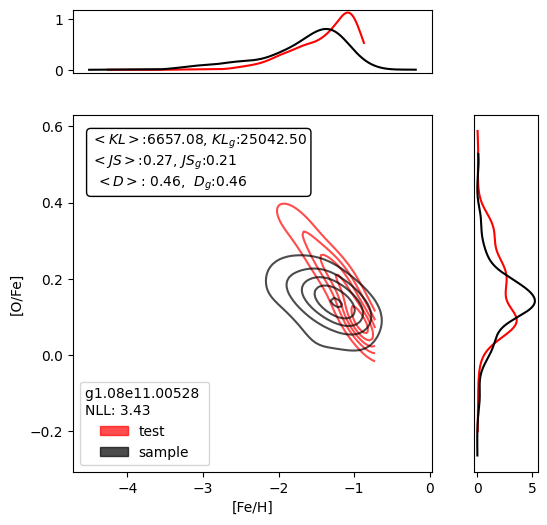

500


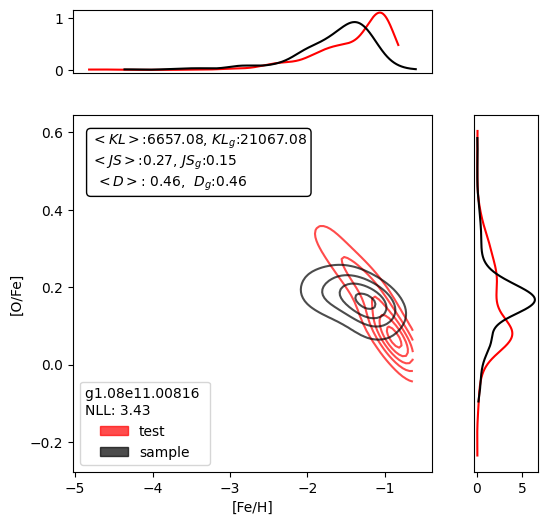

500


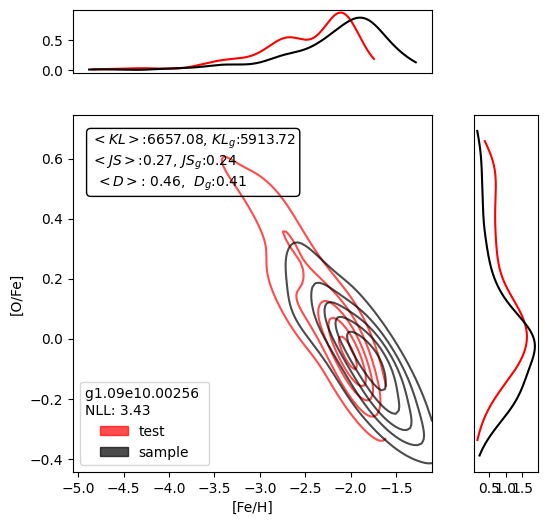

500


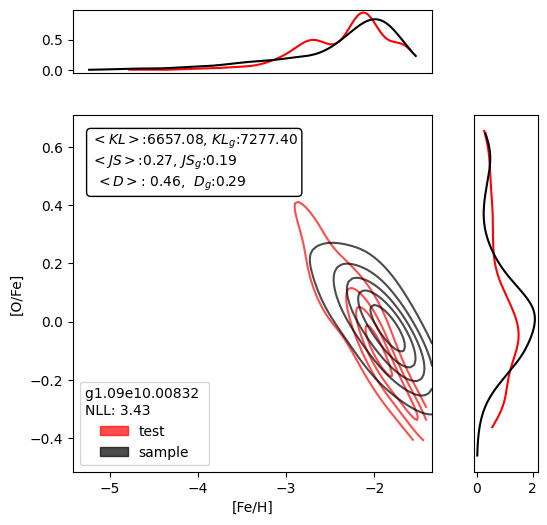

500


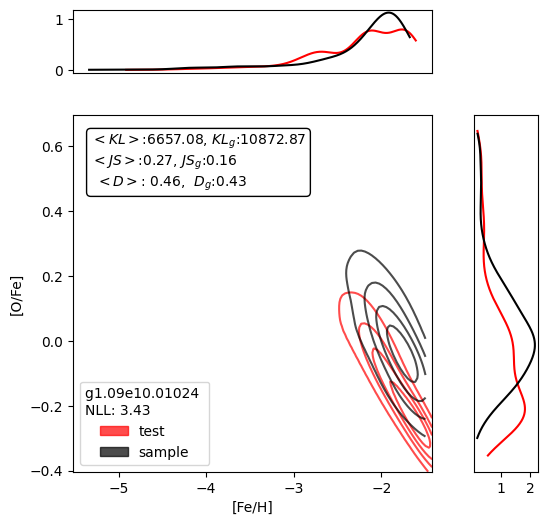

500


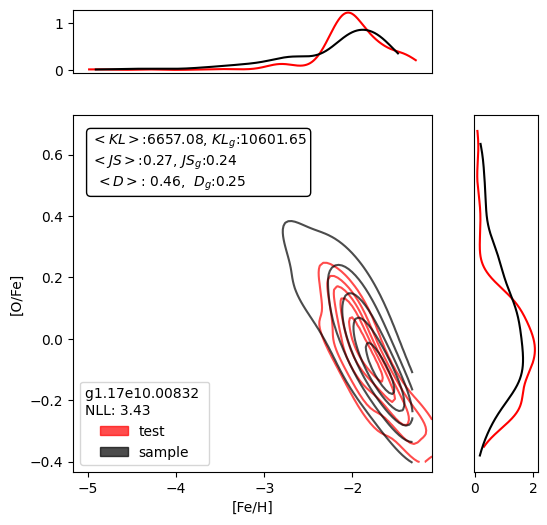

500


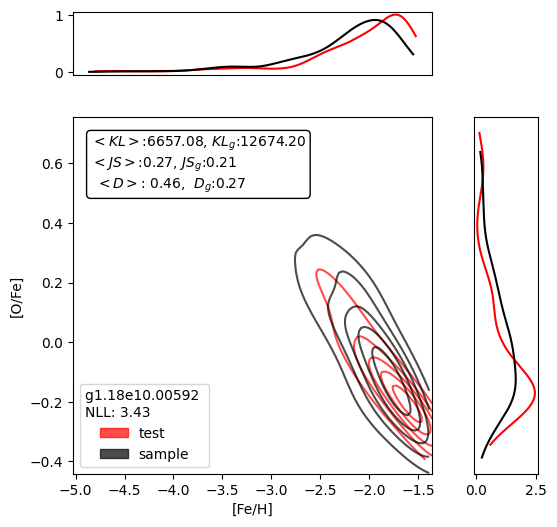

500


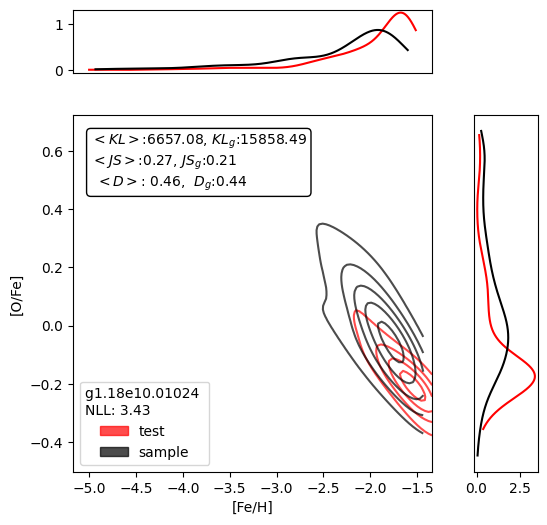

500


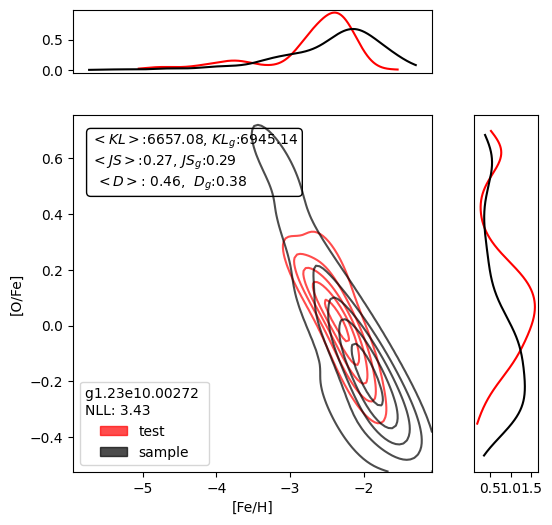

500


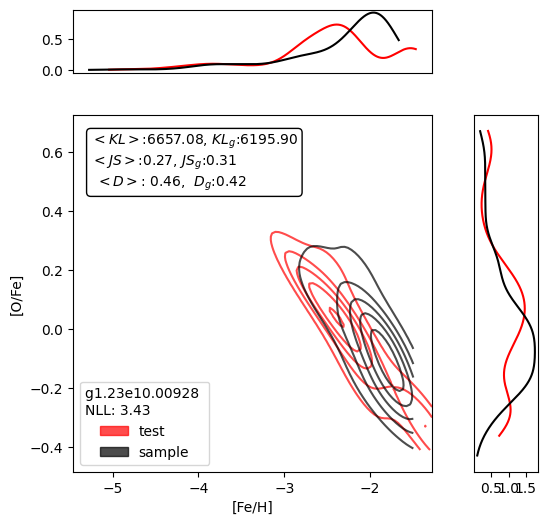

500


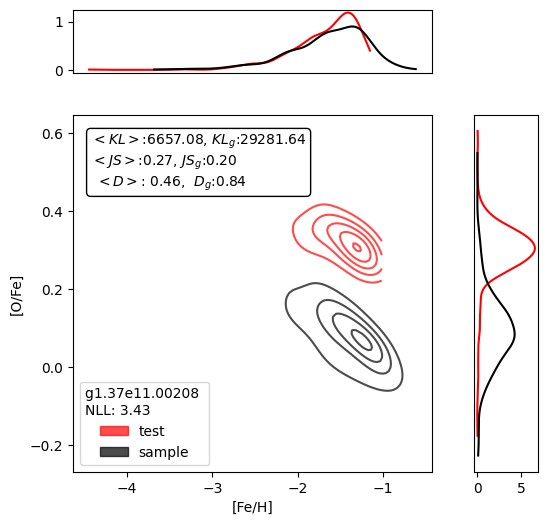

500


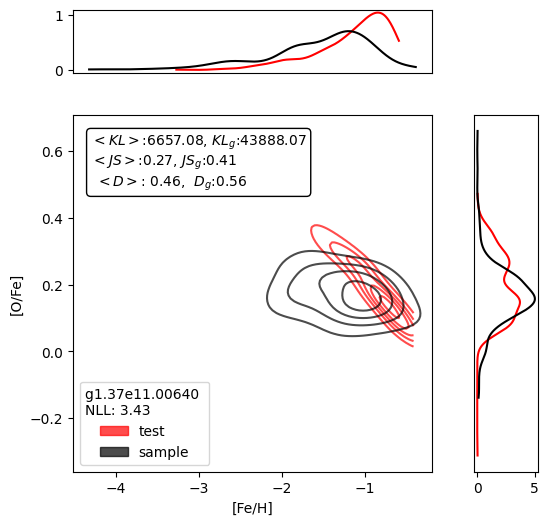

500


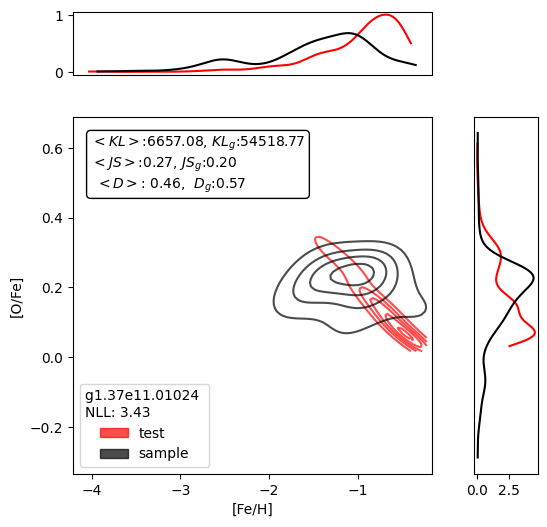

500


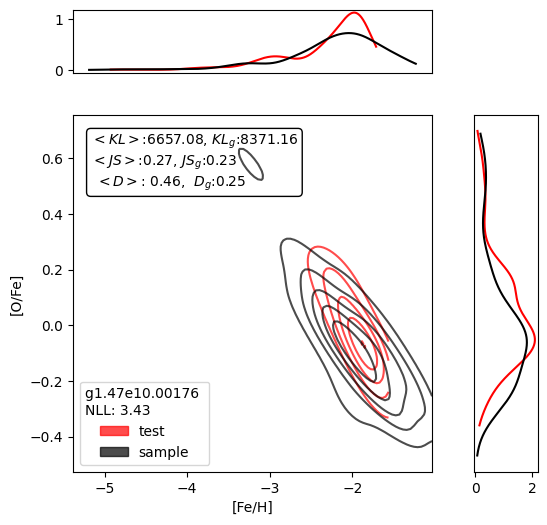

500


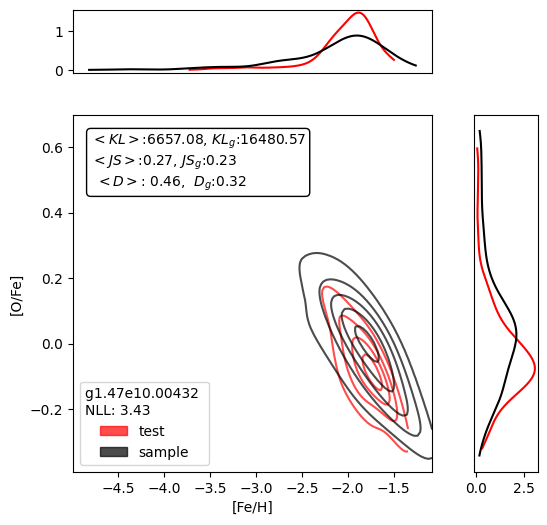

500


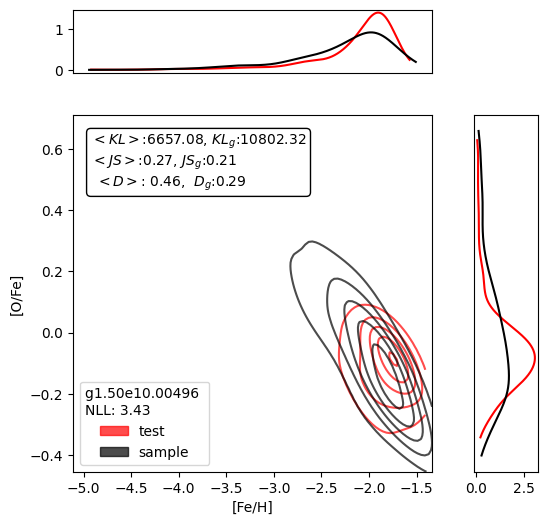

500


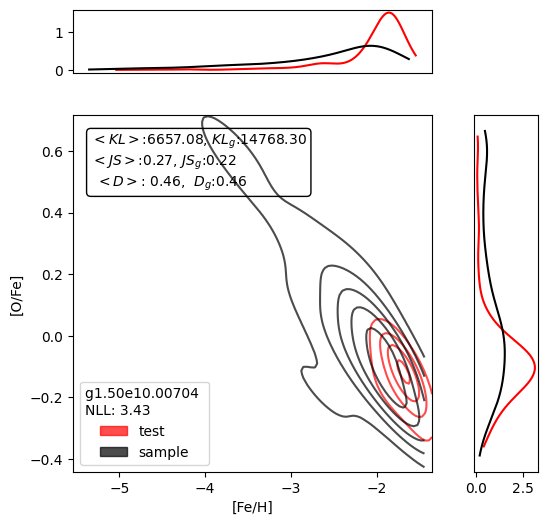

500


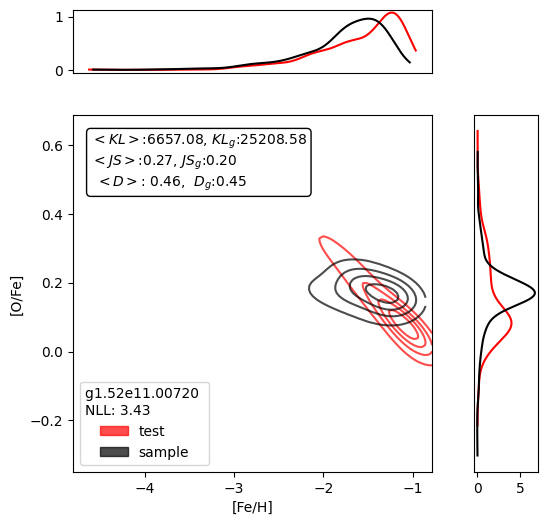

500


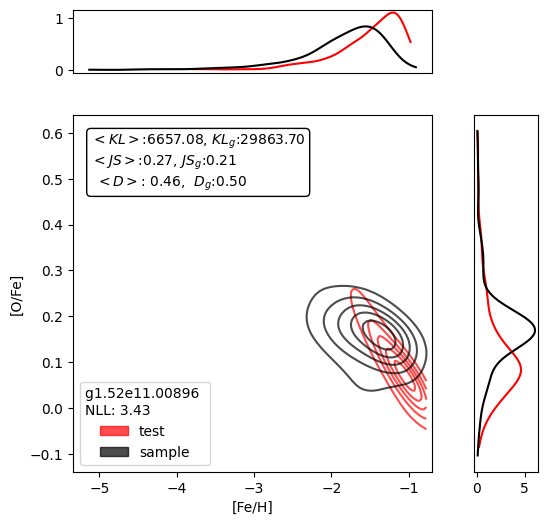

500


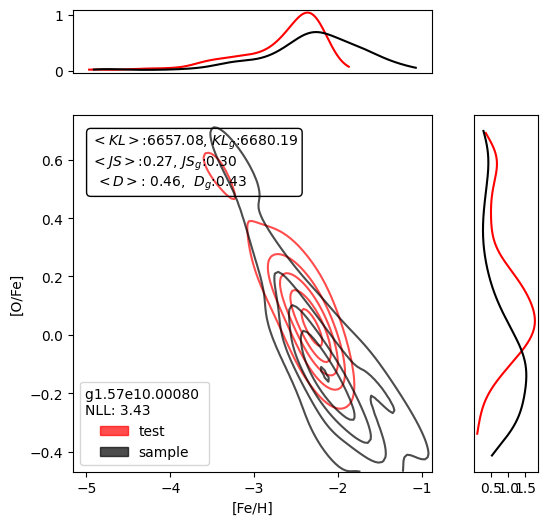

500


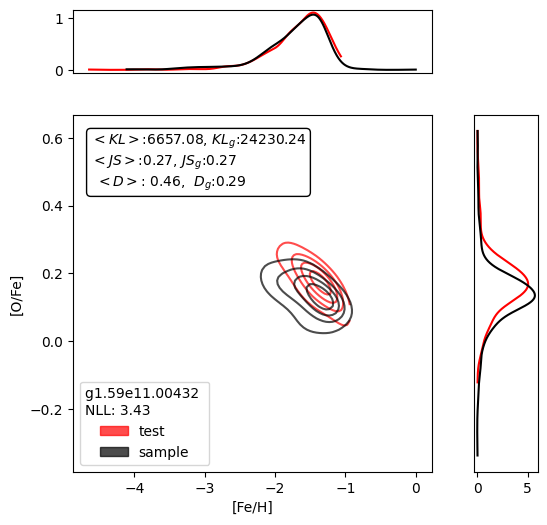

500


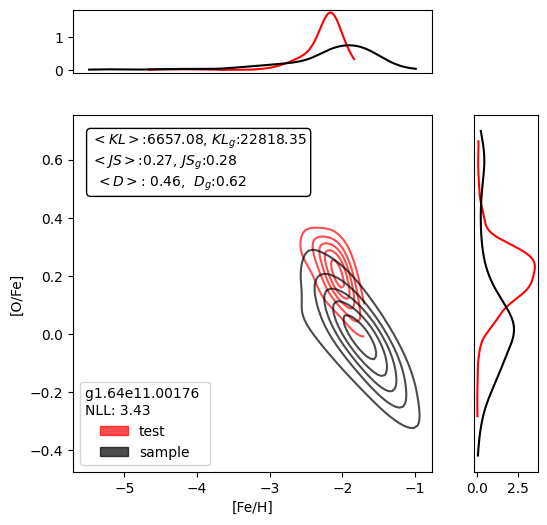

500


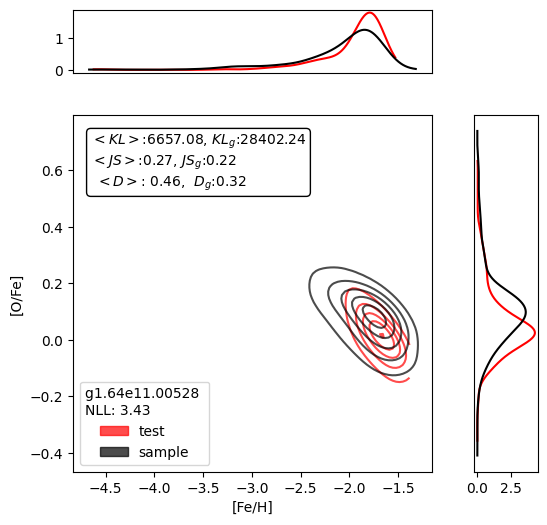

500


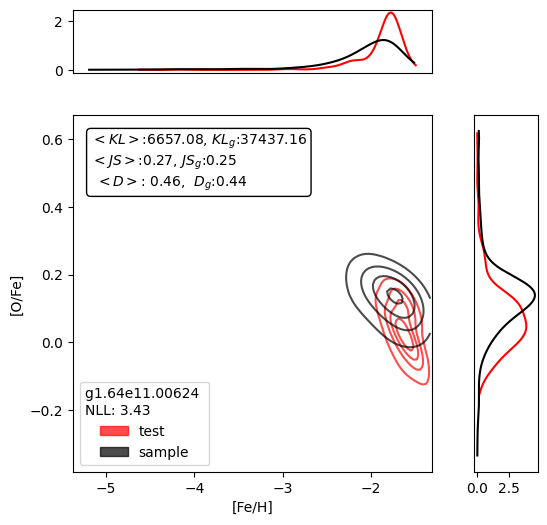

500


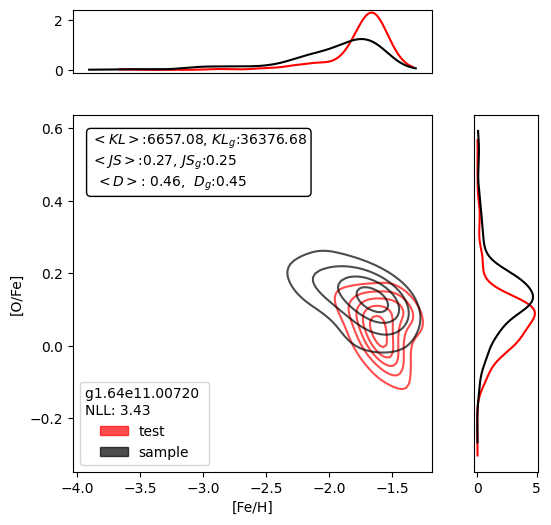

500


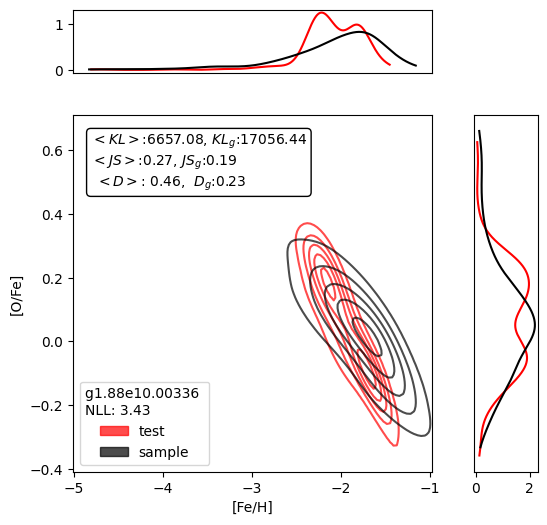

500


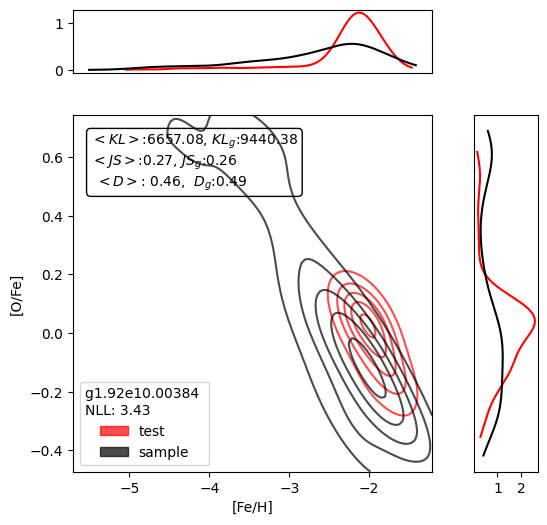

500


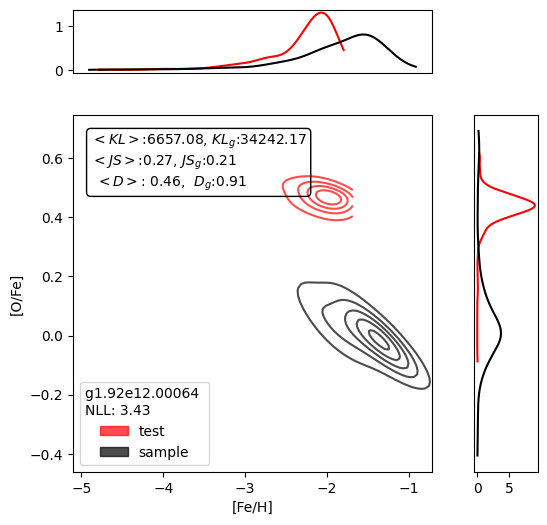

500


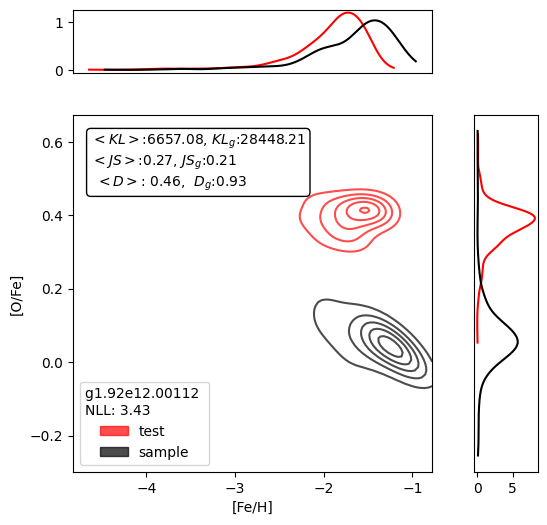

In [7]:
for galaxy in sorted(test_set['Galaxy_name'].unique()):    
        galaxy_test_set = test_set[test_set['Galaxy_name']==galaxy]
        galaxy_sample = df_sample[df_sample['Galaxy_name']==galaxy]
        
        utils.custom_kde_plot(test_df=galaxy_test_set, df_sample=galaxy_sample, Flow=Flow, inverse_rescale_file=inverse_rescale_file, nll=nll, kl_mean=kl_mean, js_mean=js_mean, D_mean=D_mean, levels=5)
        plt.show()